In [36]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from PIL import Image
import os
import 

ImportError: No module named 'opencv'

In [3]:
def mnist_Preprocessing():
	#mnist前処理
	(x_train, y_train), (x_test, y_test) = mnist.load_data()
	x_train_1 = converter(x_train, y_train, 1, 784)
	x_test_1 = converter(x_test, y_test, 1, 784)
	x_test_7 = converter(x_test, y_test, 7, 784)
	return x_train_1, x_test_1, x_test_7

In [4]:
def converter(xarray, yarray, num, outputnum):
	#numで指定されたラベルの値の該当するデータを抽出し，成形する
	xarray = xarray[np.where(yarray == num)[0]]
	xarray = xarray.astype('float32') / 255.0
	xarray = np.reshape(xarray, (len(xarray),outputnum))
	return xarray

In [5]:
def execute_OCSVM(x_train_1, x_test_1, x_test_7):
	#One Class SVM を実行
	clf = svm.OneClassSVM(nu = 0.2, kernel="rbf", gamma=0.001)
	clf.fit(x_train_1)
	#配列の頭から「１」を100個，「７」を20個取り出し予想
	test = np.vstack((x_test_7[0:100], x_test_1[0:20]))
	test1 = x_test_7[0:100]
	pred = clf.predict(test)
	return pred

In [6]:
def evaluate(pred):
	#accracyの計算
#	answer = np.array([1] * 100 + [-1] * 20)
	answer = np.array([-1] * 100 + [-1] * 20)
	acc =  len(pred[pred == answer])/120.0
	print("accuracy : " + str(acc))
	print([i for i,j in enumerate(pred) if j == -1])

In [7]:
def show_Graph(pred):
	#予想された値をグラフ化し表示・保存
	x = np.arange(0, 120, 1)
	plt.plot(x, pred)
	plt.savefig('SVMmnist.png')
	plt.show()
    

accuracy : 0.8583333333333333
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 108, 112, 113]


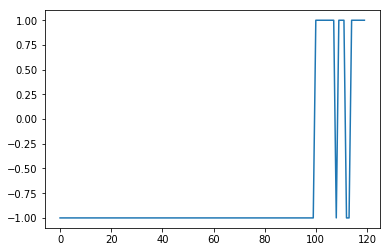

In [9]:
if __name__ == "__main__":
	x_train_1, x_test_1, x_test_7 = mnist_Preprocessing()
	pred = execute_OCSVM(x_train_1, x_test_1, x_test_7)
	evaluate(pred)
	show_Graph(pred)

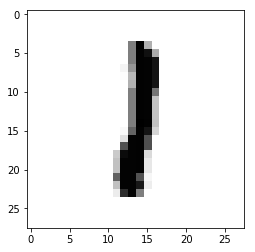

In [10]:
plt.imshow(x_test_1[108].reshape(28,28),cmap='Greys')
plt.show()

In [31]:
test = x_test_1[108].reshape(28,28)
test = test * 255
test.shape

(28, 28)

In [38]:
pil_img = Image.fromarray(test)
pil_img = pil_img.convert("RGB")
pil_img = pil_img.resize((224,224))
pil_img.save(os.path.join("/home/baba/test_VGG16/", 'mnist_test.jpg'))

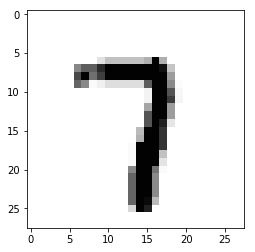

In [28]:
plt.imshow(x_test_7[115].reshape(28,28),cmap='Greys')
plt.show()

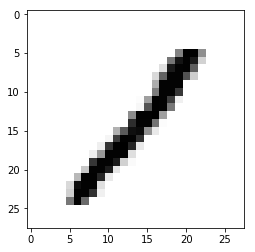

In [53]:
plt.imshow(x_test_1[1012].reshape(28,28),cmap='Greys')
plt.show()

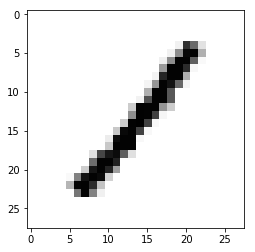

In [54]:
plt.imshow(x_test_1[1016].reshape(28,28),cmap='Greys')
plt.show()

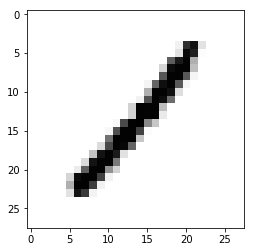

In [55]:
plt.imshow(x_test_1[1017].reshape(28,28),cmap='Greys')
plt.show()